# Lecture2: Evidence and p-value

In [1]:
%config IPCompleter.greedy=True

In [2]:
# from dotenv import load_dotenv
# load_dotenv()

In [3]:
from PIL import Image

## Introduction

### Synopsis: What did we learn in this lecture

- ML Problems: Classification & Regression
- Validation Set, Overfitting and hints of selecting a representative set
- Metrics vs Loss [Important question on overfitting with respect to training loss going down and validation loss going up to indicate overfitting ]
   - Not always true : Follow the metric not loss 
- Transfer Learning and Fine-tuning
- Why Transfer Learning Works (Zeller & Fergues viz paper)
- State of DL now [What works and what doesn't]
- Filter/ Feature & catostrophic forgetting [ if you want your model to keep performing on old data => use old(Samples)+ new in training]
- Model Zoo 
- Interpreting p-value , utilities
    - Almost always confuse the issue
    - Multivariate p-value more robust[ t-statistics]?
    - choose reverse hypothesis as null hypothesis and see if you have sufficient data . Otherwise no decision can be made
- Drive train approach
  - Objectives => Levers => Data Collection => Model
  - Strategy(Sources of value, Levers)=> Data(Availiability, Suitability)=>Analytics (Predictions, Insights) => Implementation(IT, Human Capital) => Maintenance(Environment Changes)
  - Identify & Manage Constraints across spectrum
- Prior Belief, Evidence and Utility View 
- Data Curation 
  - Bing image search 
  - L object
  - verify_images
- Datablock Api 
  - blocks
  - get_x, get_y
  - item_tfms
- Model Export
- Inference
- Covid Paper
  - Seasonality
  - Transmissibility
  - Group of cities
  - p-value
  - Visualization
- How to read paper & criticism

### Implementation Plan

- Curate Dataset
- Apply Datablock api on multiple datasets
- Explore more on p-value, t2 stats
- Read Drivetrain paper in detail and understand modeler, simulator and optimizer concepts 

## Datablock Api

### PETS problem using datablock api

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from fastai.basics import *
from fastai.vision.all import *
from nlphero.data.external import *
from fastai.vision.widgets import *

In [6]:
path = untar_data(URLs.PETS); path

Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet')

In [7]:
o = (path/"images").ls()[0]
o

Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/wheaten_terrier_112.jpg')

In [8]:
def get_breed(o): return o.name.rsplit("_", 1)[0]

In [9]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = get_breed,
    item_tfms = Resize(224)
    )

In [10]:
pets

In [11]:
dls = pets.dataloaders(path); dls

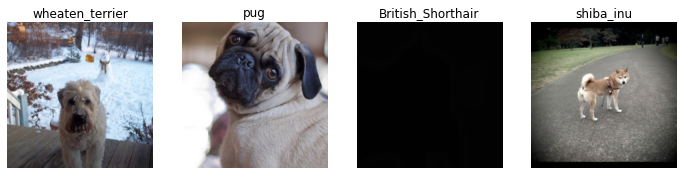

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy]); learn

In [ ]:
learn.fine_tune(2, freeze_epochs=3)

## Data Curation

### Google

In [17]:
#from google_images_download import google_images_download

In [18]:
#response = google_images_download.googleimagesdownload(); response

In [19]:
#arguments = {"keywords":"polar bear, grizzly bear, teddy Bear","limit":20,"print_urls":True}

In [21]:
#response.download(arguments)

### Bing

In [22]:
key = os.getenv("BING_KEY1"); key

'082b7548901a43c6ba3b54f0590aec40'

In [23]:
# from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
# from msrest.authentication import CognitiveServicesCredentials as auth

In [24]:
# def search_images_bing(key, term, count=150, min_sz=128):
#     client = api("https://api.cognitive.microsoft.com", auth(key))
#     return L(client.images.search(query=term, count=count, min_height=min_sz, min_width=min_sz).value)

In [25]:
results = search_images_bing(key, "Sarah Shahi", count=1)
imgs = results.attrgot("content_url")
imgs

(#1) ['https://celebmafia.com/wp-content/uploads/2018/05/sarah-shahi-2018-environmental-media-association-awards-in-beverly-hills-1.jpg']

In [26]:
download_url(imgs[0], dest=Path("Sarah_Shahi.jpg"))

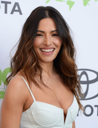

In [27]:
im = Image.open(Path("Sarah_Shahi.jpg"))
im.to_thumb(128,128)

### Datasets

#### Bears

In [28]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [29]:
if not path.exists():
    path.mkdir(exist_ok=True)
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f"{o} bear", count=150)
        download_images(dest, urls=results.attrgot("content_url"))

In [30]:
for o in bear_types:
    print((path/o))

bears/grizzly
bears/black
bears/teddy


In [31]:
fns = get_image_files(path)
fns

(#425) [Path('bears/teddy/00000046.jpg'),Path('bears/teddy/00000119.jpg'),Path('bears/teddy/00000041.jpg'),Path('bears/teddy/00000090.jpg'),Path('bears/teddy/00000117.jpg'),Path('bears/teddy/00000069.png'),Path('bears/teddy/00000033.jpg'),Path('bears/teddy/00000034.jpg'),Path('bears/teddy/00000110.jpg'),Path('bears/teddy/00000048.jpg')...]

In [32]:
failed = verify_images(fns)
failed

(#0) []

In [33]:
failed.map(Path.unlink)

(#0) []

#### DoppelGanger

In [34]:
# def construct_image_dataset(clstypes, dest,key=key, count=150):
#     path = Path(dest)
#     if not path.exists():
#         path.mkdir(exist_ok=True)
#         for o in clstypes:
#             d = o.replace(" ", "_")
#             dest = (path/d)
#             print(f"Dowloading images in {d}")
#             dest.mkdir(exist_ok=True)

#             results = search_images_bing(key, o, count=count)
#             download_images(dest, urls=results.attrgot("content_url"))
#             print(f"Finished Dowloading images in {d}")

#         for i in range(3):
#             fns = get_image_files(path)
#             failed = verify_images(fns)
#             print(failed)
#             failed.map(Path.unlink)
#     return path
    

In [35]:
clstypes = "Sarah Shahi", "Mercedes Masohn"
dest = "Doppelganger"
count=150

In [37]:
path = construct_image_dataset(clstypes,dest,count); path

Path('/Landmark2/pdo/.nlphero/data/Doppelganger')

In [38]:
actresses = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.2, seed=42),
        get_y = parent_label,
        item_tfms = Resize(224)
        )

In [28]:
actresses

In [29]:
dls = actresses.dataloaders(path); dls

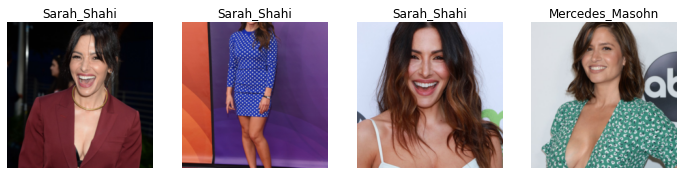

In [30]:
dls.valid.show_batch(max_n=4, nrows=1)

In [22]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy]); learn

In [23]:
learn.fine_tune(2, freeze_epochs=5)

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

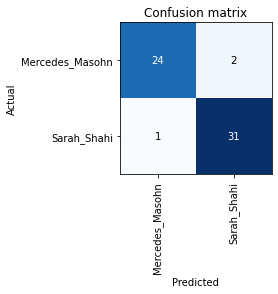

In [25]:
interp.plot_confusion_matrix()

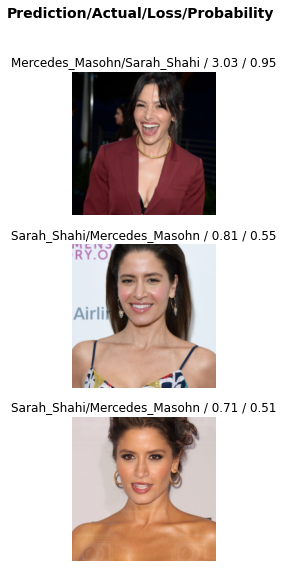

In [29]:
interp.plot_top_losses(3, nrows=3)

#### DoppelGanger2

In [36]:
clstypes = "Jeffrey Dean Morgan", "Javier Bardem"
dest = "Doppelganger2"
# count=150

In [38]:
path = construct_image_dataset(clstypes,dest); path

Dowloading images in Jeffrey_Dean_Morgan


Finished Dowloading images in Jeffrey_Dean_Morgan
Dowloading images in Javier_Bardem


Finished Dowloading images in Javier_Bardem


(#13) [Path('Doppelganger2/Jeffrey_Dean_Morgan/00000041.jpg'),Path('Doppelganger2/Jeffrey_Dean_Morgan/00000063.jpg'),Path('Doppelganger2/Jeffrey_Dean_Morgan/00000111.jpg'),Path('Doppelganger2/Jeffrey_Dean_Morgan/00000116.jpg'),Path('Doppelganger2/Jeffrey_Dean_Morgan/00000007.jpg'),Path('Doppelganger2/Javier_Bardem/00000027.jpg'),Path('Doppelganger2/Javier_Bardem/00000029.jpg'),Path('Doppelganger2/Javier_Bardem/00000034.jpg'),Path('Doppelganger2/Javier_Bardem/00000041.jpg'),Path('Doppelganger2/Javier_Bardem/00000065.jpg')...]


(#0) []


(#0) []


Path('Doppelganger2')

In [39]:
# !rm -rf Doppelganger2

In [41]:
actors = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.3, seed=42),
        get_y = parent_label,
        item_tfms = Resize(224)
       )

In [42]:
dls = actors.dataloaders(path)
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn

In [43]:
learn.fine_tune(3,freeze_epochs=5)

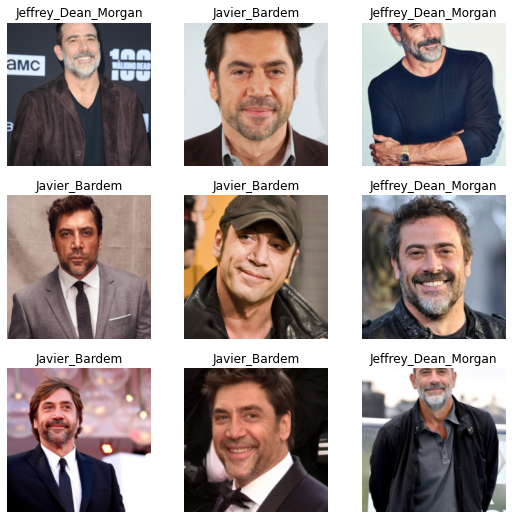

In [44]:
dls.valid.show_batch()

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp

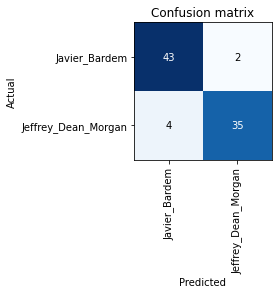

In [46]:
interp.plot_confusion_matrix()

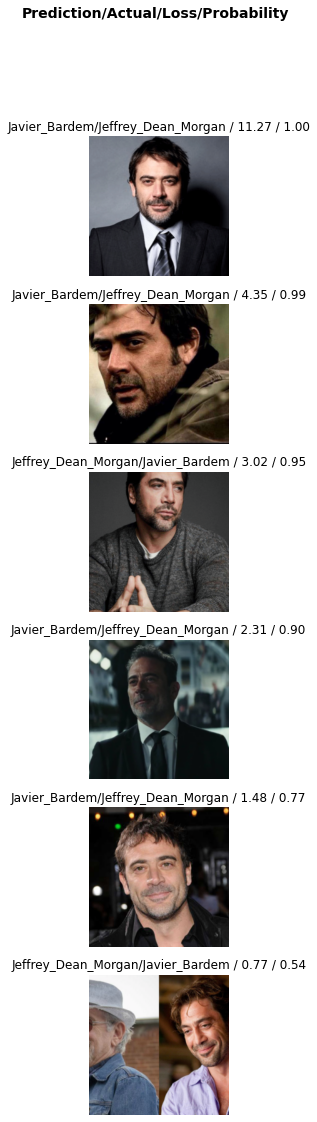

In [47]:
interp.plot_top_losses(6,nrows=6)

#### Doppelganger3

In [49]:
clstypes = "Benicio Del Toro", "Brad Pitt"
dest = "Doppelganger3"

In [50]:
path = construct_image_dataset(clstypes,dest, count=150); path

Dowloading images in Benicio_Del_Toro


Finished Dowloading images in Benicio_Del_Toro
Dowloading images in Brad_Pitt



 Download of https://dailystormer.name/wp-content/uploads/2019/11/brad-pitt-2.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p Doppelganger3/Brad_Pitt
$ cd Doppelganger3/Brad_Pitt
$ wget -c https://dailystormer.name/wp-content/uploads/2019/11/brad-pitt-2.jpg
$ tar xf brad-pitt-2.jpg
 And re-run your code once the download is successful

Finished Dowloading images in Brad_Pitt


(#14) [Path('Doppelganger3/Brad_Pitt/00000040.jpg'),Path('Doppelganger3/Brad_Pitt/00000149.jpg'),Path('Doppelganger3/Brad_Pitt/00000125.jpg'),Path('Doppelganger3/Brad_Pitt/00000059.jpg'),Path('Doppelganger3/Brad_Pitt/00000130.jpg'),Path('Doppelganger3/Brad_Pitt/00000137.jpg'),Path('Doppelganger3/Brad_Pitt/00000013.jpg'),Path('Doppelganger3/Brad_Pitt/00000037.jpg'),Path('Doppelganger3/Brad_Pitt/00000138.jpg'),Path('Doppelganger3/Brad_Pitt/00000060.jpg')...]


(#0) []


(#0) []


Path('Doppelganger3')

In [119]:
actors = DataBlock(
         blocks = (ImageBlock, CategoryBlock),
         get_items = get_image_files,
         splitter = RandomSplitter(valid_pct=0.3, seed=43),
         get_y = parent_label,
         item_tfms = Resize(224)
        )

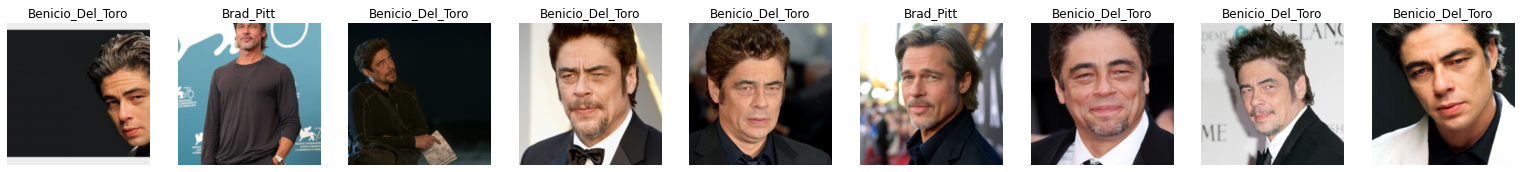

In [53]:
dls = actors.dataloaders(path)
dls.valid.show_batch(nrows=1)

In [54]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn

In [55]:
learn.fine_tune(3, freeze_epochs=5)

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp

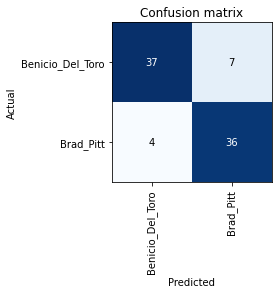

In [57]:
interp.plot_confusion_matrix()

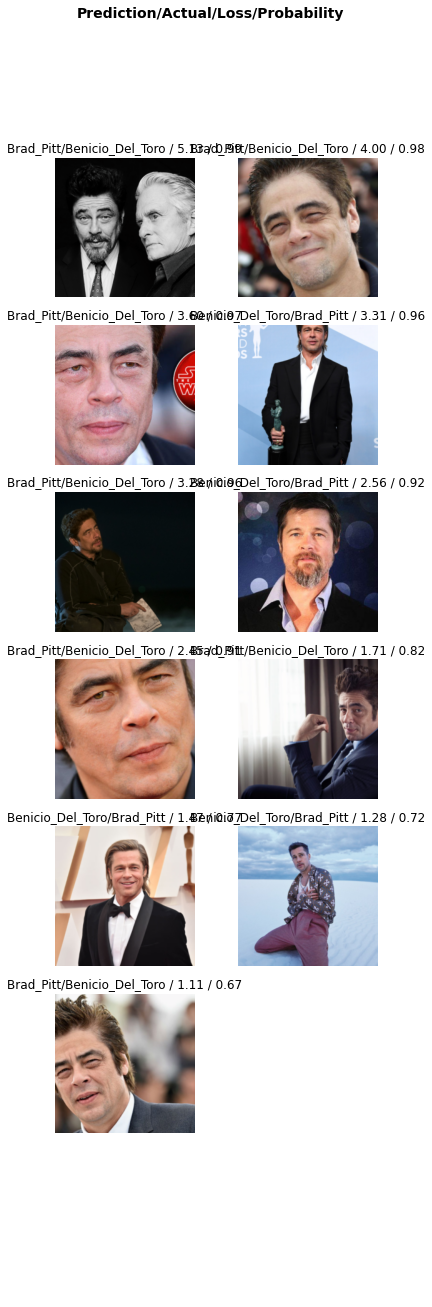

In [59]:
interp.plot_top_losses(11, nrows=7)

#### DoppelgangerMixed

In [99]:
os.getenv("NLPHERO_HOME")

'/Landmark2/pdo/.nlphero'

In [100]:
list_ds()

(#13) ['av-healthcare-analytics-ii','adult_sample','DoppelgangerMixed','twitter-airline-sentiment','glove840b300dtxt','Bears','oxford-iiit-pet','spooky','60k-stack-overflow-questions-with-quality-rate','imdb_tok'...]

In [101]:
path = get_ds("DoppelgangerMixed"); path

Path('/Landmark2/pdo/.nlphero/data/DoppelgangerMixed')

In [102]:
actors = DataBlock(
         blocks = (ImageBlock, CategoryBlock),
         get_items = get_image_files, 
         get_y = parent_label, 
         splitter = RandomSplitter(valid_pct=0.3, seed=43),
         item_tfms = Resize(224)
        )

In [103]:
dls = actors.dataloaders(path); dls

In [104]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy, error_rate])
learn

In [34]:
learn.fine_tune(4, freeze_epochs=4)

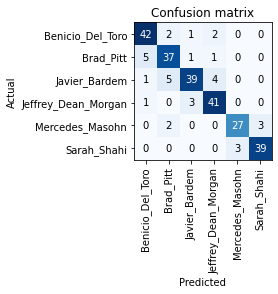

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

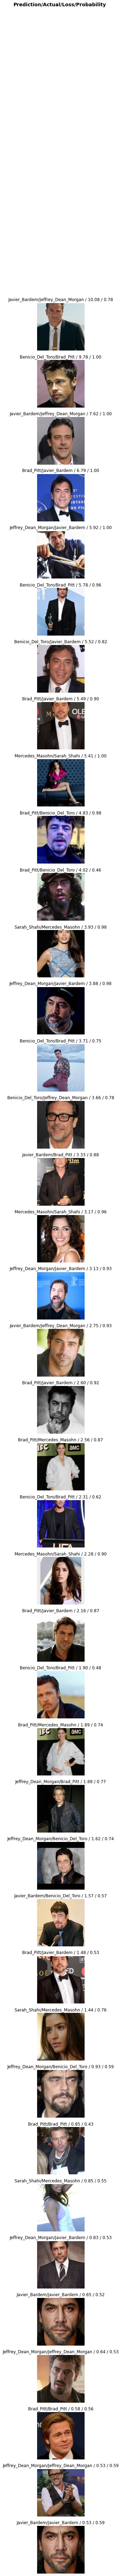

In [124]:
interp.plot_top_losses(k=40, nrows=40)

In [37]:
interp

In [40]:
learn.export(fname='DoppelGanger.pkl')

In [43]:
# learn.export??

In [105]:
learn.dls.train.vocab

['Benicio_Del_Toro', 'Brad_Pitt', 'Javier_Bardem', 'Jeffrey_Dean_Morgan', 'Mercedes_Masohn', 'Sarah_Shahi']

In [54]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [74]:
# cleaner??

In [75]:
# interp.top_losses()

In [106]:
learn_inf = load_learner?

#### Model Inference

In [107]:
learn_inf = load_learner(fname='DoppelGanger.pkl'); learn_inf

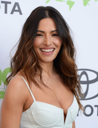

In [109]:
im = Image.open(Path("Sarah_Shahi.jpg"))
im.to_thumb(128,128)

In [111]:
learn_inf.predict("Sarah_Shahi.jpg")

('Sarah_Shahi',
 tensor(5),
 tensor([3.1567e-09, 4.7201e-06, 5.2629e-09, 1.3037e-10, 1.9874e-05, 9.9998e-01]))

### UI

In [39]:
btn_upload = widgets.FileUpload(); btn_upload

FileUpload(value={}, description='Upload')

In [40]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['Sarah_Shahi.jpg'])

In [41]:
img = PILImage.create(btn_upload.data[-1])

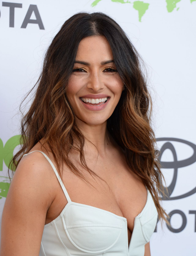

In [42]:
img.to_thumb(256,256)

In [43]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()